In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("dataset//commute_time.csv")

# Display summary statistics for numerical columns
print(df.describe())


               Age     Distance         Time
count  1107.000000  1107.000000  1105.000000
mean     25.725384     8.405032    94.582081
std       5.673175     7.797152    77.106379
min      18.000000     0.000000     1.000000
25%      23.000000     4.000000    40.000000
50%      25.000000     7.000000    84.000000
75%      27.000000    10.000000   130.000000
max      60.000000    50.000000   780.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  439 non-null    object 
 1   Age        1107 non-null   int64  
 2   Gender     1107 non-null   object 
 3   Major      1106 non-null   object 
 4   Distance   1107 non-null   float64
 5   Mode       1098 non-null   object 
 6   Traffic    1106 non-null   object 
 7   Time       1105 non-null   float64
 8   Column 1   1 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 78.0+ KB


In [114]:
df = df.drop(['Timestamp','Column 1'], axis=1)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1107 non-null   int64  
 1   Gender    1107 non-null   object 
 2   Major     1106 non-null   object 
 3   Distance  1107 non-null   float64
 4   Mode      1098 non-null   object 
 5   Traffic   1106 non-null   object 
 6   Time      1105 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.7+ KB


In [116]:
df.head(10)

,Age,Gender,Major,Distance,Mode,Traffic,Time
0,25,Male,CSE,11.0,Bus,High,200.0
1,25,Male,CSE,2.0,Walk,Low,20.0
2,25,Male,CSE,4.0,Bus,Medium,120.0
3,24,Female,CSE,4.3,Bus,High,120.0
4,25,Male,CSE,6.0,Bus,Medium,65.0
5,25,Male,CSE,9.0,Bus,Medium,90.0
6,25,Male,CSE,4.0,Bus,High,100.0
7,25,Male,CSE,16.0,Bus,High,220.0
8,25,Male,CSE,6.0,Bus,High,1.0
9,24,Male,CSE,2.0,Rickshaw,Medium,35.0


In [117]:
df.describe()

,Age,Distance,Time
count,1107.000000,1107.000000,1105.000000
mean,25.725384,8.405032,94.582081
std,5.673175,7.797152,77.106379
min,18.000000,0.000000,1.000000
25%,23.000000,4.000000,40.000000
50%,25.000000,7.000000,84.000000
75%,27.000000,10.000000,130.000000
max,60.000000,50.000000,780.000000


In [118]:
# Drop The Null Values
df = df.dropna()

# Drop The Duplicate Rows
df.drop_duplicates(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1045 non-null   int64  
 1   Gender    1045 non-null   object 
 2   Major     1045 non-null   object 
 3   Distance  1045 non-null   float64
 4   Mode      1045 non-null   object 
 5   Traffic   1045 non-null   object 
 6   Time      1045 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 65.3+ KB


In [120]:
columns_to_check = ['Gender', 'Major', 'Mode', 'Traffic']
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female' 'Other']
Unique values in column 'Major': ['CSE' 'EEE' 'CS' 'Business' 'Engineering' 'BBA' 'ME' 'MBBS' 'IT'
 'Computer Science' 'Biology' 'Mathematics' 'Agriculture ' 'Bss' 'Arts'
 'Education ' 'BA' 'CE' 'Other' 'Ag' 'BSAg' 'Bsag' 'Agricultural '
 'Agriculture' 'BSAg ' 'Physics' 'Social Work' ' URP'
 'nuclear engineering' 'Chemistry ' 'English' 'Economics' 'Law' 'GE' 'IPE']
Unique values in column 'Mode': ['Bus' 'Walk' 'Rickshaw' 'Car' 'Bike' 'Rickshaw ' 'Bicycle' 'Cycle '
 'Cycle' 'Riskha' 'Autorickshaw ' 'AutoRicshaw' 'Autorickshaw' 'bicycle '
 'rickshaw']
Unique values in column 'Traffic': ['High' 'Low' 'Medium']


In [121]:
import re

# Function to normalize 'Major'
def normalize_major(value):
    if pd.isna(value):
        return value
    value = value.strip().lower()

    if re.search(r'cse|cs|computer science|it', value):  
        return 'Computer Science'

    if re.search(r'business|bba', value):
        return 'Business Administration'

    if re.search(r'mathematics|math', value):
        return 'Mathematics'

    if re.search(r'physics', value):
        return 'Physics'

    if re.search(r'biology', value):
        return 'Biology'

    if re.search(r'agriculture|ag|bsag|agricultural', value):  
        return 'Agriculture'

    if re.search(r'social work', value):
        return 'Social Work'

    if re.search(r'engineering|general engineering|nuclear engineering|eee|me|ce|ge', value): 
        return 'Engineering'

    if re.search(r'arts|ba|bss', value): 
        return 'Arts'

    if re.search(r'education', value):  
        return 'Education'

    if re.search(r'urp|urban and regional planning', value):  
        return 'Urban and Regional Planning'

    if re.search(r'chemistry', value): 
        return 'Chemistry'

    if re.search(r'english', value):
        return 'English'

    if re.search(r'economics', value):
        return 'Economics'
    
    if re.search(r'law', value):
        return 'Law'

    if re.search(r'industrial and production engineering|ipe', value):
        return 'Industrial and Production Engineering'

    if re.search(r'mbbs', value): 
        return 'Medicine'

    return 'Other'


# Function to normalize 'Mode'
def normalize_mode(value):
    if pd.isna(value):
        return value
    value = value.strip().lower()
    
    if re.search(r'rickshaw|riskha|autorickshaw|autoricshaw', value, re.IGNORECASE):
        return 'Rickshaw'
    
    if re.search(r'cycle|bicycle', value, re.IGNORECASE):
        return 'Cycle'
    
    return value.capitalize()

# Apply normalization functions
df['Major'] = df['Major'].map(normalize_major)
df['Mode'] = df['Mode'].map(normalize_mode)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1045 non-null   int64  
 1   Gender    1045 non-null   object 
 2   Major     1045 non-null   object 
 3   Distance  1045 non-null   float64
 4   Mode      1045 non-null   object 
 5   Traffic   1045 non-null   object 
 6   Time      1045 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 65.3+ KB


In [123]:
for index, row in df.iterrows():
        if row['Time'] < 8 * row['Distance'] and row['Distance'] < 3:
           print("First Condition: ",index, "Time: ",df.at[index, 'Time'], " Distance: ", df.at[index, 'Distance'])
        elif row['Distance'] > 60:
            print("Second Condition:",index, "Time: ",df.at[index, 'Time'], " Distance: ", df.at[index, 'Distance'])
  

First Condition:  60 Time:  19.6  Distance:  2.8
First Condition:  164 Time:  4.0  Distance:  2.0
First Condition:  168 Time:  2.0  Distance:  0.5
First Condition:  169 Time:  6.0  Distance:  2.0
First Condition:  193 Time:  8.0  Distance:  2.1
First Condition:  207 Time:  3.0  Distance:  1.5
First Condition:  252 Time:  8.0  Distance:  1.3
First Condition:  370 Time:  3.0  Distance:  0.5
First Condition:  427 Time:  6.0  Distance:  1.0
First Condition:  429 Time:  15.0  Distance:  2.3
First Condition:  499 Time:  15.0  Distance:  2.0


In [124]:
import pandas as pd

def update_time_based_on_conditions(df):
    for index, row in df.iterrows():
        if row['Time'] < 8 * row['Distance'] and row['Distance'] < 3:
            df.at[index, 'Time'] = row['Distance'] * 8
    return df


# Updating Some Outlier Time
df = update_time_based_on_conditions(df)
print(df)

      Age  Gender                                  Major  Distance  Mode  \
0      25    Male                       Computer Science      11.0   Bus   
1      25    Male                       Computer Science       2.0  Walk   
2      25    Male                       Computer Science       4.0   Bus   
3      24  Female                       Computer Science       4.3   Bus   
4      25    Male                       Computer Science       6.0   Bus   
...   ...     ...                                    ...       ...   ...   
1101   26    Male  Industrial and Production Engineering       0.5  Walk   
1102   25    Male                               Medicine       0.2  Walk   
1103   27    Male                       Computer Science       4.0   Bus   
1104   27    Male                       Computer Science       7.0   Bus   
1105   22    Male                       Computer Science       6.0   Bus   

     Traffic   Time  
0       High  200.0  
1        Low   20.0  
2     Medium  120.0  

In [125]:
# To check Whether Anomalies are still left
for index, row in df.iterrows():
        if row['Time'] < 8 * row['Distance'] and row['Distance'] < 3:
           print("First Condition: ",index, "Time: ",df.at[index, 'Time'], " Distance: ", df.at[index, 'Distance'])
        elif row['Distance'] > 60:
            print("Second Condition:",index, "Time: ",df.at[index, 'Time'], " Distance: ", df.at[index, 'Distance'])

In [126]:
columns_to_check = ['Gender', 'Major', 'Mode', 'Traffic']
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female' 'Other']
Unique values in column 'Major': ['Computer Science' 'Engineering' 'Business Administration' 'Medicine'
 'Biology' 'Agriculture' 'Arts' 'Education' 'Other' 'Social Work'
 'Urban and Regional Planning' 'Chemistry' 'English' 'Law'
 'Industrial and Production Engineering']
Unique values in column 'Mode': ['Bus' 'Walk' 'Rickshaw' 'Car' 'Bike' 'Cycle']
Unique values in column 'Traffic': ['High' 'Low' 'Medium']


In [127]:
df = df.set_axis(['Age', 'Gender', 'Major', 'Distance(km)', 'Transportation_mode','Traffic','Commute_time'], axis=1)

In [128]:
# saving the dataframe
df.to_csv('./cleaned_dataset/Commute_Time.csv')

## EDA
### Univariate Analysis
#### Numerical Columns

C:\Users\user\AppData\Local\Temp\ipykernel_36360\2618129563.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transportation_mode', data=df, palette='viridis', ax=axes[1, 1])
C:\Users\user\AppData\Local\Temp\ipykernel_36360\2618129563.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic', data=df, palette='coolwarm', ax=axes[2, 0])


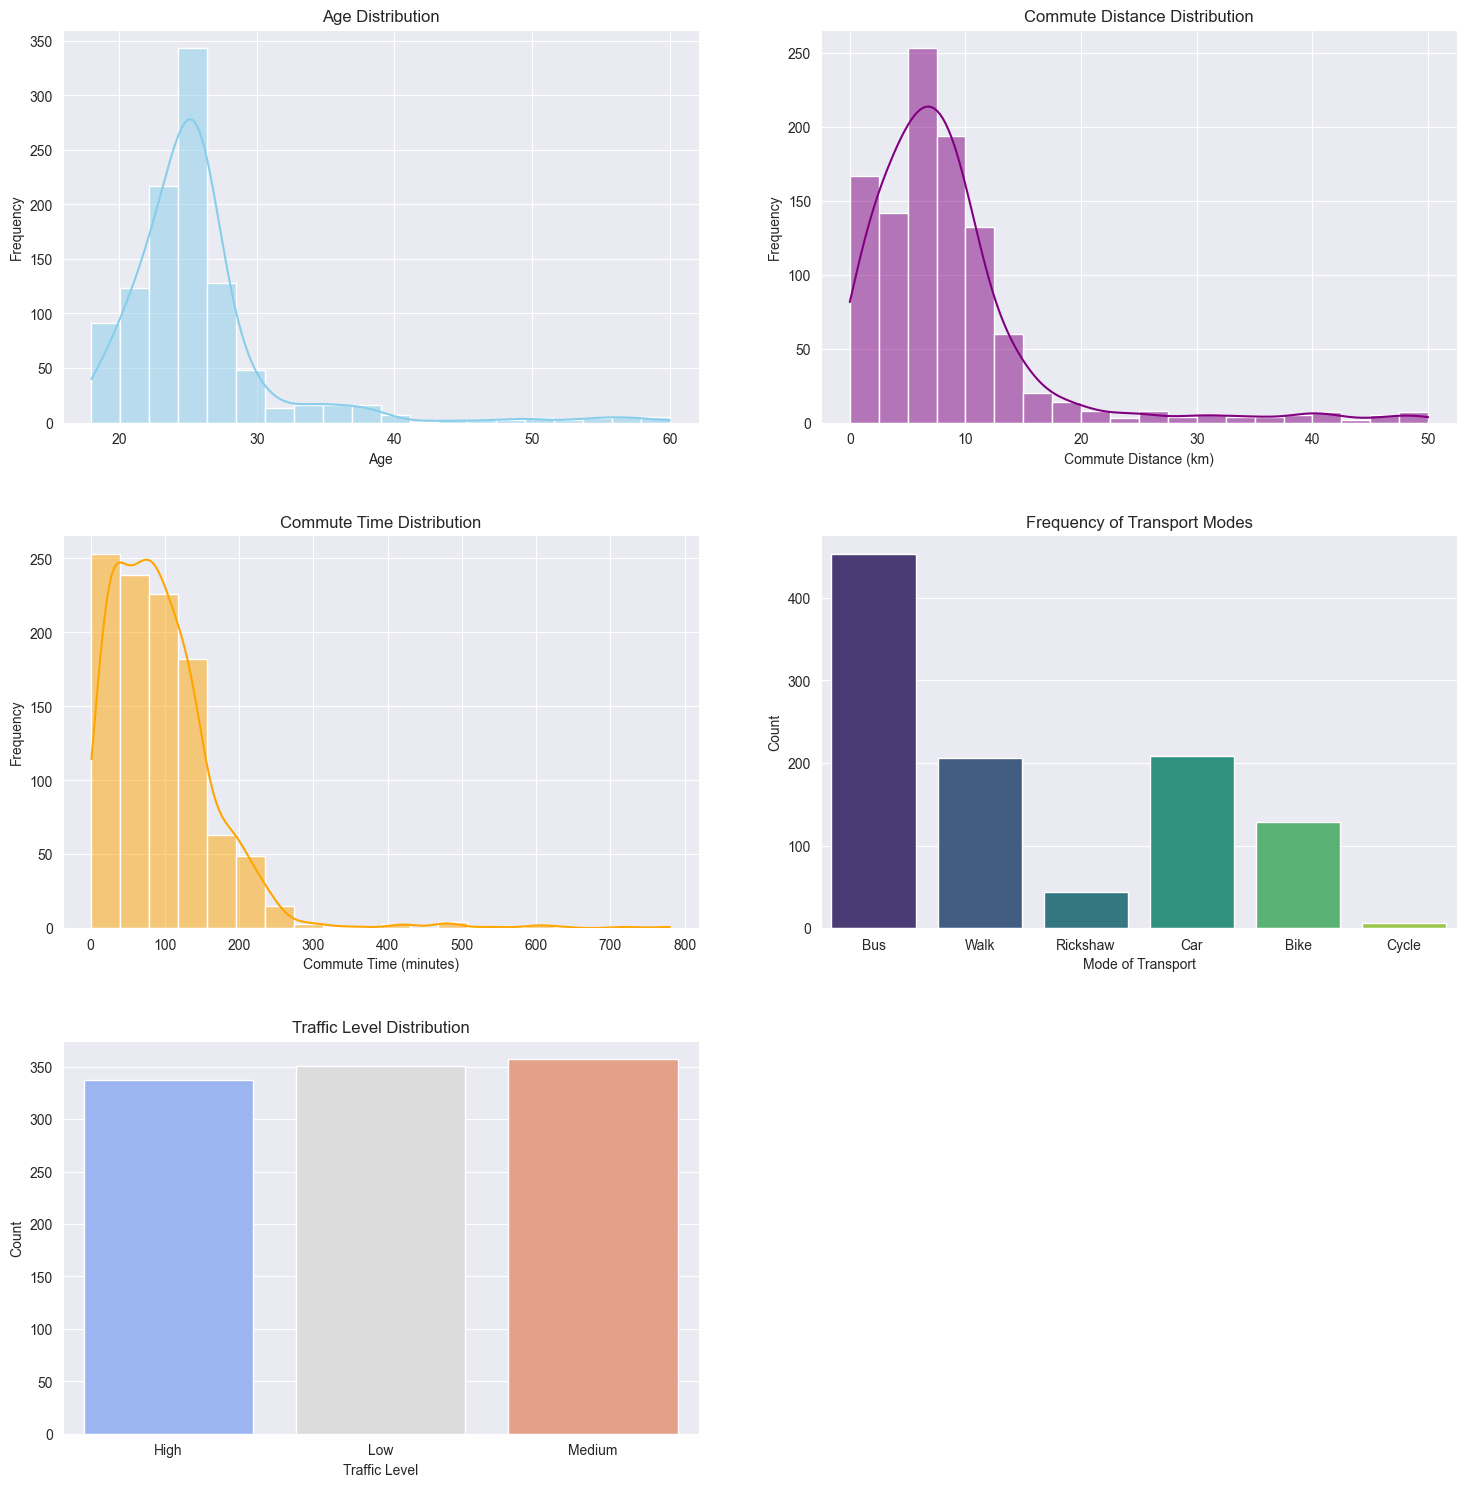

In [129]:

# Define the figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
fig.tight_layout(pad=6)

# Plot age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Distance distribution
sns.histplot(df['Distance(km)'], bins=20, kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Commute Distance Distribution')
axes[0, 1].set_xlabel('Commute Distance (km)')
axes[0, 1].set_ylabel('Frequency')

# Commute time distribution
sns.histplot(df['Commute_time'], bins=20, kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Commute Time Distribution')
axes[1, 0].set_xlabel('Commute Time (minutes)')
axes[1, 0].set_ylabel('Frequency')

# Transportation mode frequency
sns.countplot(x='Transportation_mode', data=df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Frequency of Transport Modes')
axes[1, 1].set_xlabel('Mode of Transport')
axes[1, 1].set_ylabel('Count')

# Traffic level distribution
sns.countplot(x='Traffic', data=df, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Traffic Level Distribution')
axes[2, 0].set_xlabel('Traffic Level')
axes[2, 0].set_ylabel('Count')

# Turn off the last unused subplot (bottom-right corner)
axes[2, 1].axis('off')

# Show the plot
plt.show()

### Bivariate Analysis

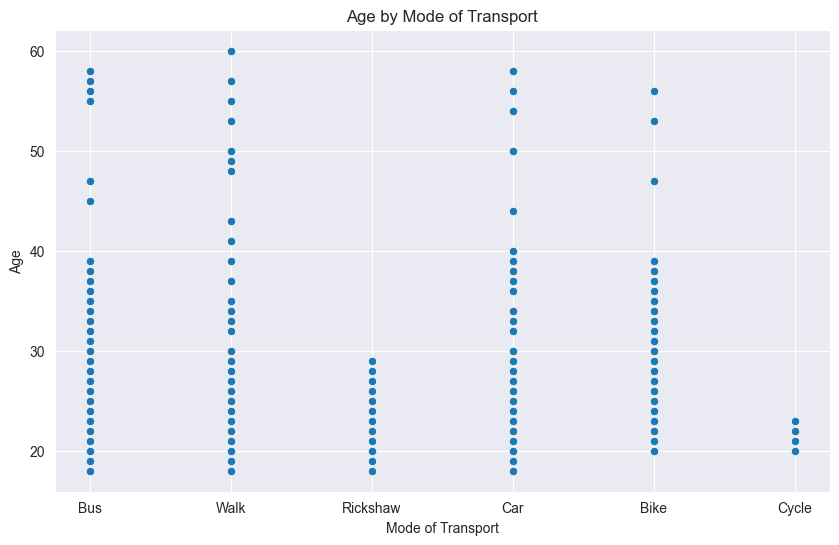

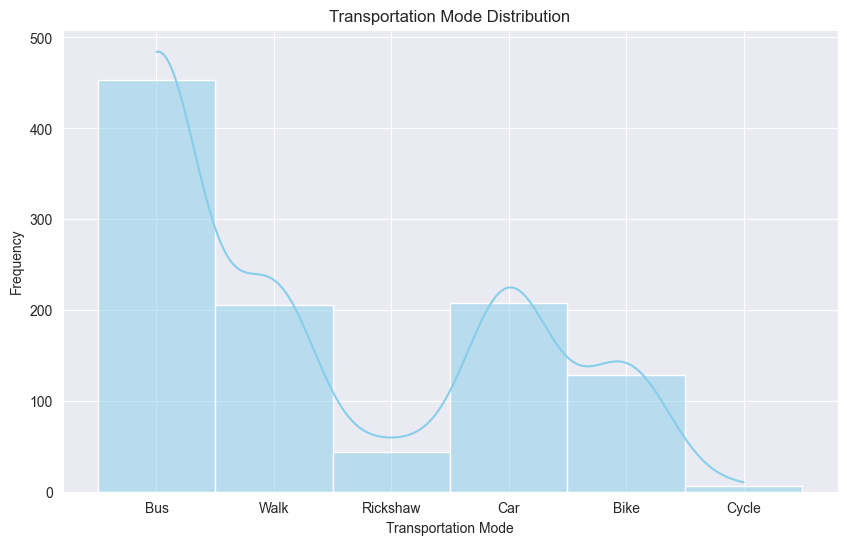

In [130]:

# Analyze if age impacts commute distance or mode of transport
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transportation_mode', y='Age', data=df)
plt.title('Age by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Age')
plt.show()

# Plot number of people using different medium of transportation
plt.figure(figsize=(10, 6))
sns.histplot(df['Transportation_mode'], bins=20, kde=True, color='skyblue')
plt.title('Transportation Mode Distribution')
plt.xlabel('Transportation Mode')
plt.ylabel('Frequency')
plt.show()

From the **Transportation Mode Frequency** we can say that most people travel by bus. Then by Car. People also uses bike , rickshaw as their least mode of transportation and also cycle.


C:\Users\user\AppData\Local\Temp\ipykernel_36360\1518092619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transportation_mode', y='Distance(km)', data=df, ax=axes[0, 1], palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_36360\1518092619.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transportation_mode', y='Commute_time', data=df, ax=axes[1, 1], palette='coolwarm')


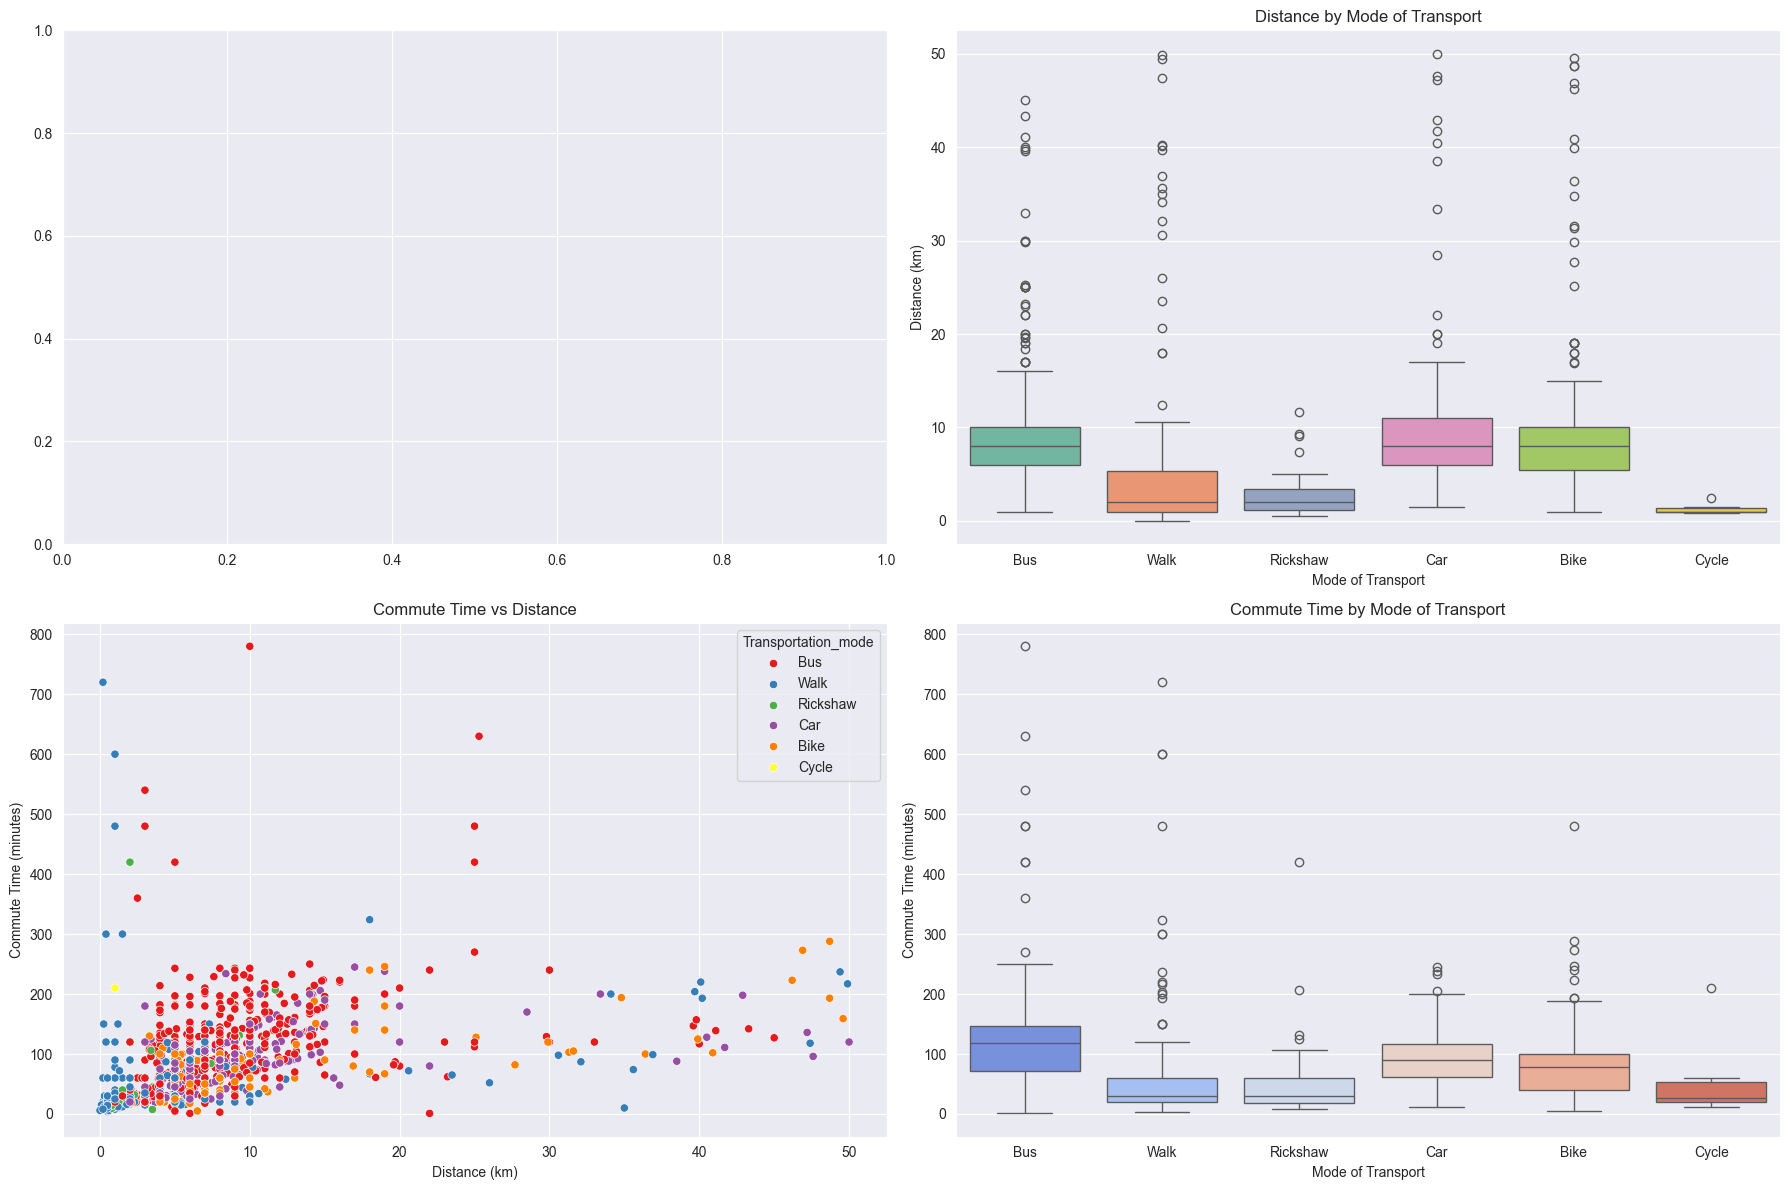

In [131]:
# Updated Plot with Subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 2: Transportation Mode vs Distance
sns.boxplot(x='Transportation_mode', y='Distance(km)', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Distance by Mode of Transport')
axes[0, 1].set_xlabel('Mode of Transport')
axes[0, 1].set_ylabel('Distance (km)')

# Plot 3: Commute Time vs Distance
sns.scatterplot(x='Distance(km)', y='Commute_time', hue='Transportation_mode', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Commute Time vs Distance')
axes[1, 0].set_xlabel('Distance (km)')
axes[1, 0].set_ylabel('Commute Time (minutes)')

# Plot 4: Transportation Mode vs Commute Time
sns.boxplot(x='Transportation_mode', y='Commute_time', data=df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Commute Time by Mode of Transport')
axes[1, 1].set_xlabel('Mode of Transport')
axes[1, 1].set_ylabel('Commute Time (minutes)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Analysis Outcomes of the Plots

- Younger individuals prefer walking/cycling; buses/rickshaws suit all ages.
- Short trips (<5 km): walking/cycling; long trips: cars/buses.
- Commute time rises with distance; buses have higher variability.
- Walking is quickest; cars balance time/distance; buses vary with traffic.

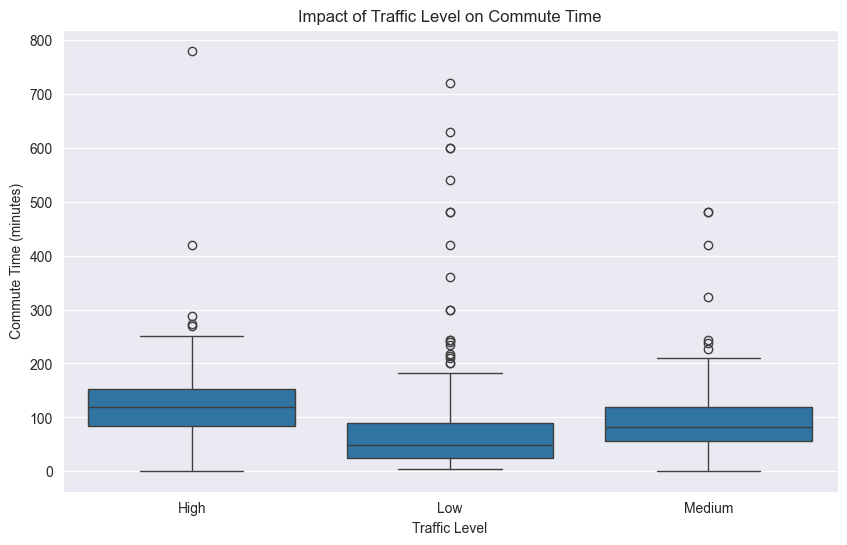

In [132]:


# Impact of Traffic Levels on Commute Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Commute_time', data=df)
plt.title('Impact of Traffic Level on Commute Time')
plt.xlabel('Traffic Level')
plt.ylabel('Commute Time (minutes)')
plt.show()


### Traffic Distribution
The plot shows that most of the  people faces a high level of traffic. Very few people faces low traffic level.

The second plot shows that people whose commute time is higher also faces high level of traffic and people with low commute time faces low level of traffic.

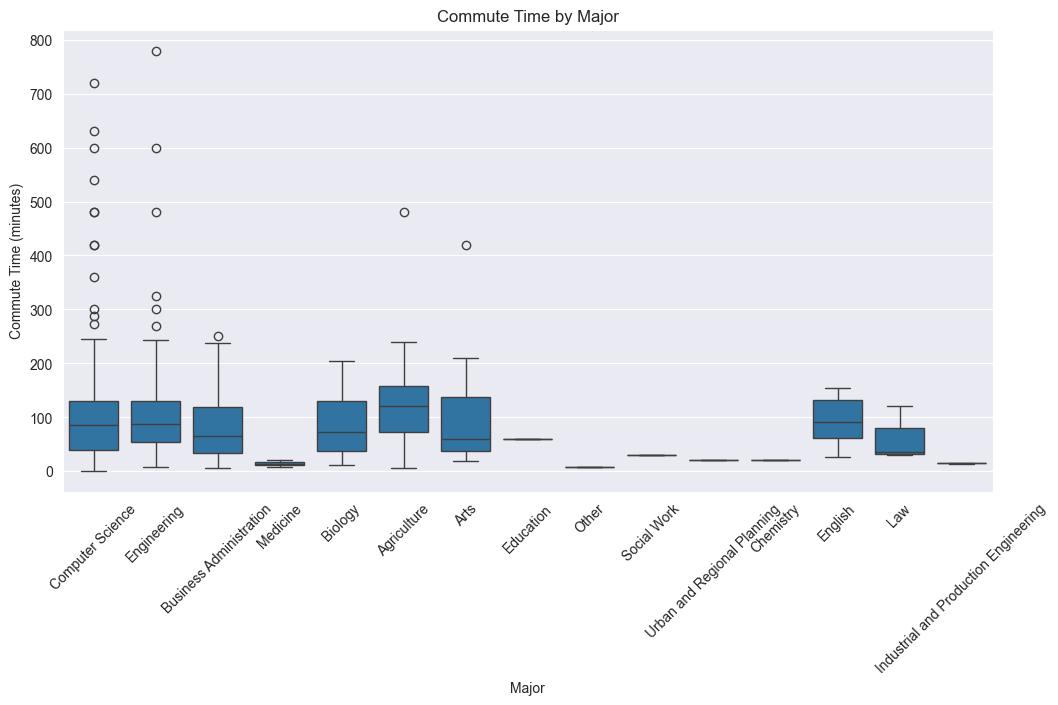

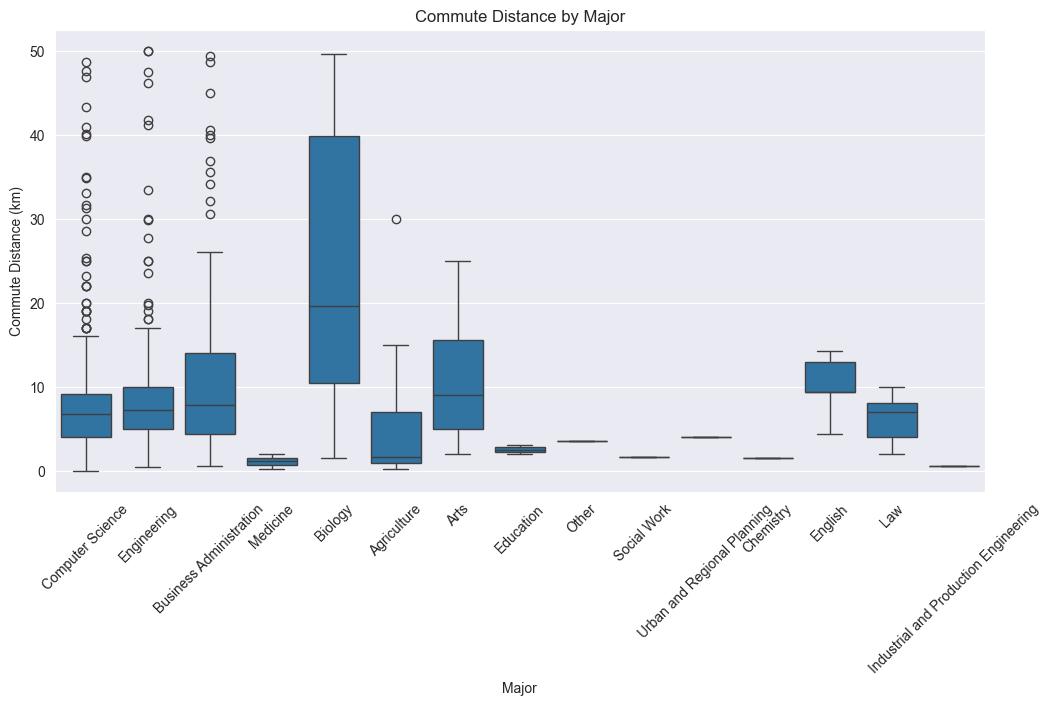

In [133]:
# Commute Time by Major
plt.figure(figsize=(12, 6))
sns.boxplot(x='Major', y='Commute_time', data=df)
plt.title('Commute Time by Major')
plt.xticks(rotation=45)
plt.xlabel('Major')
plt.ylabel('Commute Time (minutes)')
plt.show()

# Commute Distance by Major
plt.figure(figsize=(12, 6))
sns.boxplot(x='Major', y='Distance(km)', data=df)
plt.title('Commute Distance by Major')
plt.xticks(rotation=45)
plt.xlabel('Major')
plt.ylabel('Commute Distance (km)')
plt.show()


### Major based Distribution
Based on the major we can see that  most  of the data in the dataset have a major of CSE with only one people have EEE as major.
The average commute time and commute distance is same between the two majors.
### Major based Distribution
From the visualizations, it is clear that the **Major** 'CSE' dominates the dataset, followed by other majors like Business and Engineering. Commute time and distance vary significantly across different majors. Students from technical majors (e.g., CSE and EEE) tend to have slightly longer commute times and distances compared to those from other majors. However, majors related to social sciences and arts seem to have relatively shorter commutes. This could be influenced by the proximity of their institutions or faculties to residential areas.


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1045 non-null   int64  
 1   Gender               1045 non-null   object 
 2   Major                1045 non-null   object 
 3   Distance(km)         1045 non-null   float64
 4   Transportation_mode  1045 non-null   object 
 5   Traffic              1045 non-null   object 
 6   Commute_time         1045 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 97.6+ KB


In [135]:
traffic_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Traffic Level'] = df['Traffic'].map(traffic_mapping)
df.head()

,Age,Gender,Major,Distance(km),Transportation_mode,Traffic,Commute_time,Traffic Level
0,25,Male,Computer Science,11.0,Bus,High,200.0,2
1,25,Male,Computer Science,2.0,Walk,Low,20.0,0
2,25,Male,Computer Science,4.0,Bus,Medium,120.0,1
3,24,Female,Computer Science,4.3,Bus,High,120.0,2
4,25,Male,Computer Science,6.0,Bus,Medium,65.0,1


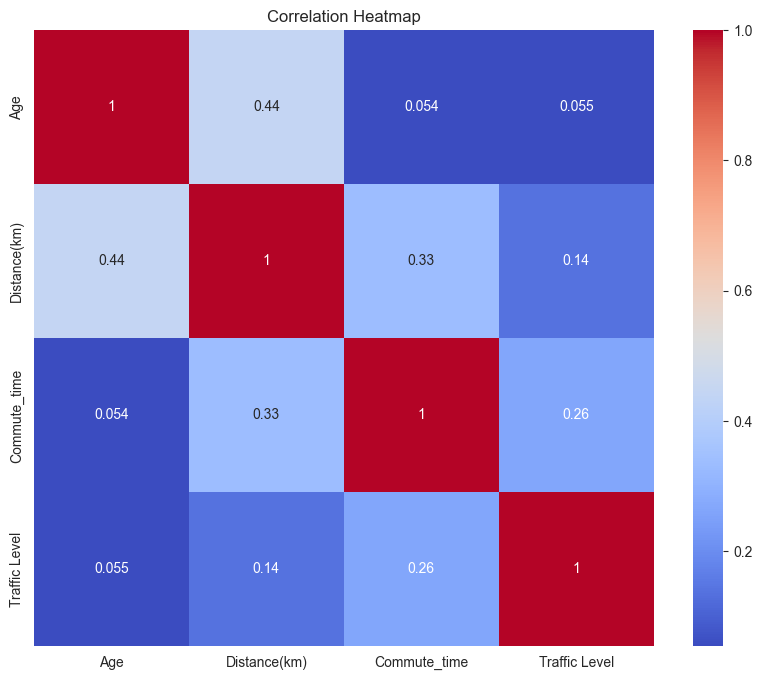

In [136]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Distance(km)', 'Commute_time', 'Traffic Level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap

 - **Strong Positive Correlation:**
   - Distance(km) and Commute_time have a strong positive correlation. This makes sense as longer distances generally take more time to commute.

 - **Weak Positive Correlation:**
   - Age has a weak positive correlation with both Distance(km) and Commute_time . Traffic Level also has a weak positive correlation with Commute_time and Distance(km) 
 - **Weak Negative Correlation:**
   - Age and Traffic Level have a weak negative correlation.

### Overall Insight
We can see there is a strong correlation and some weak correlation between different features.
There is a clear strong positive relationship between **Distance(km) vs. Commute_time**. As distance increases, commute time also tends to increase, which is expected. However, the relationship isn't perfectly linear.There are  some scatters.

There are No strong linear relationships betweeen **Age vs. other variables** . The scatterplots looks random.

Distance and commute time has very weak correlation with traffic level.
We need more data to find out clear correlation. Though there is a correlation This dataset needs more Variety, Volume and Quality which are the most significant characteristics of a dataset.

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1045 non-null   int64  
 1   Gender               1045 non-null   object 
 2   Major                1045 non-null   object 
 3   Distance(km)         1045 non-null   float64
 4   Transportation_mode  1045 non-null   object 
 5   Traffic              1045 non-null   object 
 6   Commute_time         1045 non-null   float64
 7   Traffic Level        1045 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 105.8+ KB


In [139]:
# Drop unnecessary columns
df = df.drop(['Age','Gender', 'Major','Traffic Level'], axis=1)

# Handle missing values
df = df.dropna()
df.head(5)

,Distance(km),Transportation_mode,Traffic,Commute_time
0,11.0,Bus,High,200.0
1,2.0,Walk,Low,20.0
2,4.0,Bus,Medium,120.0
3,4.3,Bus,High,120.0
4,6.0,Bus,Medium,65.0


In [140]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance(km)         1045 non-null   float64
 1   Transportation_mode  1045 non-null   object 
 2   Traffic              1045 non-null   object 
 3   Commute_time         1045 non-null   float64
dtypes: float64(2), object(2)
memory usage: 73.1+ KB


In [141]:
df["Traffic"].unique()
df['Traffic'] = df['Traffic'].str.strip()


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance(km)         1045 non-null   float64
 1   Transportation_mode  1045 non-null   object 
 2   Traffic              1045 non-null   object 
 3   Commute_time         1045 non-null   float64
dtypes: float64(2), object(2)
memory usage: 73.1+ KB


In [143]:
df['Traffic'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [144]:
df['Traffic'].value_counts()

Traffic
Medium    357
Low       351
High      337
Name: count, dtype: int64

In [145]:
df = pd.get_dummies(df, ['Transportation_mode', 'Traffic'])
df.columns



Index(['Distance(km)', 'Commute_time', 'Transportation_mode_Bike',
       'Transportation_mode_Bus', 'Transportation_mode_Car',
       'Transportation_mode_Cycle', 'Transportation_mode_Rickshaw',
       'Transportation_mode_Walk', 'Traffic_High', 'Traffic_Low',
       'Traffic_Medium'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Distance(km)                  1045 non-null   float64
 1   Commute_time                  1045 non-null   float64
 2   Transportation_mode_Bike      1045 non-null   bool   
 3   Transportation_mode_Bus       1045 non-null   bool   
 4   Transportation_mode_Car       1045 non-null   bool   
 5   Transportation_mode_Cycle     1045 non-null   bool   
 6   Transportation_mode_Rickshaw  1045 non-null   bool   
 7   Transportation_mode_Walk      1045 non-null   bool   
 8   Traffic_High                  1045 non-null   bool   
 9   Traffic_Low                   1045 non-null   bool   
 10  Traffic_Medium                1045 non-null   bool   
dtypes: bool(9), float64(2)
memory usage: 66.0 KB


In [147]:
# Define features and target
X = df.drop('Commute_time', axis=1)
y = df['Commute_time']

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Distance(km)                  1045 non-null   float64
 1   Transportation_mode_Bike      1045 non-null   bool   
 2   Transportation_mode_Bus       1045 non-null   bool   
 3   Transportation_mode_Car       1045 non-null   bool   
 4   Transportation_mode_Cycle     1045 non-null   bool   
 5   Transportation_mode_Rickshaw  1045 non-null   bool   
 6   Transportation_mode_Walk      1045 non-null   bool   
 7   Traffic_High                  1045 non-null   bool   
 8   Traffic_Low                   1045 non-null   bool   
 9   Traffic_Medium                1045 non-null   bool   
dtypes: bool(9), float64(1)
memory usage: 57.8 KB


In [149]:
# Initialize the Linear Regression model
model = LinearRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')



In [150]:
# Train the model on the entire dataset to calculate feature importance
model.fit(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


In [151]:
print("K-Fold Cross Validation Results:")
print(f"Mean Absolute Error (MAE): {-np.mean(mae_scores):.2f}")
print(f"Root Mean Squared Error (RMSE): {-np.mean(rmse_scores):.2f}")
print(f"R-squared (R2): {np.mean(r2_scores):.2f}")
print("\nFeature Importance:")
print(feature_importance)

K-Fold Cross Validation Results:
Mean Absolute Error (MAE): 39.74
Root Mean Squared Error (RMSE): 69.11
R-squared (R2): 0.21

Feature Importance:
                        Feature  Coefficient
2       Transportation_mode_Bus    30.148717
7                  Traffic_High    20.273479
4     Transportation_mode_Cycle     5.606895
0                  Distance(km)     2.870097
3       Transportation_mode_Car     1.943431
9                Traffic_Medium    -7.535819
6      Transportation_mode_Walk   -11.115689
1      Transportation_mode_Bike   -11.648903
8                   Traffic_Low   -12.737661
5  Transportation_mode_Rickshaw   -14.934451


In [152]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [153]:
# Initialize the Ridge Regression model
model1 = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(model1, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [154]:
best_model1 = grid_search.best_estimator_
print("Best Regularization Strength(lambda):", grid_search.best_params_)
print("Model Performance(MSE)",-(grid_search.best_score_))


Best Regularization Strength(lambda): {'alpha': 10.0}
Model Performance(MSE) 4850.170970378848


In [155]:
grid_search1 = GridSearchCV(model1, param_grid, cv=kf, scoring='r2')
grid_search1.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='r2')

In [156]:
best_model2 = grid_search1.best_estimator_
print("Best Regularization Strength(lambda):", grid_search1.best_params_)
print("Model Performance(r2)",(grid_search1.best_score_))

Best Regularization Strength(lambda): {'alpha': 10.0}
Model Performance(r2) 0.21218427797841893


In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 6807.99
Mean Absolute Error (MAE): 40.83
R-squared (R2 Score): 0.24


## Insights
The dataset lacks sufficient variety, volume, and quality, limiting model performance. Insights from Linear, Ridge Regression, and Random Forest Regressor are as follows:

### Impact of Features:
- **Positive Impacts**: Transportation_mode_Bus (+30.15), Traffic_High (+20.27), Distance(km) (+5.61)
- **Negative Impacts**: Transportation_mode_Car (-53.31), Traffic_Medium (-13.57), Traffic_Low and Transportation_mode_Walk (minor).

### Model Performance:
- **Linear Regression**: MAE = 39.74, RMSE = 69.11, R² = 0.20
- **Ridge Regression**: Alpha = 10.0, R² = 0.21, MSE = 4850.17
- **Random Forest Regressor**:
  - Test **Mean Absolute Error (MAE)**: 40.83
  - Test **Root Mean Squared Error (RMSE)**: 69.11
  - Test **R-squared (R² Score)**: 0.24
  - Observations: Random Forest achieves slightly better R² than Linear and Ridge Regression but still limited by data constraints.

### Conclusion:
Commute time is mostly influenced by transportation modes and traffic conditions. Public transport (Bus, Rickshaw) and high traffic increase commute time, while personal vehicles reduce it. 
The dataset size and variability are key limitations. More data and advanced techniques are needed for better performance.

In [158]:
def user_input_predict(model, feature_names):
    print("Please provide the following input values:")

    distance_km = float(input("Distance (in km): "))
    transportation_mode = input("Transportation mode (Bike, Bus, Car, Cycle, Rickshaw, Walk): ").strip().capitalize()
    traffic_level = input("Traffic level (High, Medium, Low): ").strip().capitalize()

    # Combine all input features
    input_data = {
        'Distance(km)': distance_km,
        'Transportation_mode': transportation_mode,
        'Traffic': traffic_level
    }

    # Convert the input data into a DataFrame and encode it
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, columns=['Transportation_mode', 'Traffic'])
    input_df = input_df.reindex(columns=feature_names, fill_value=0)

    # Predicting the commute time
    predicted_time = model.predict(input_df)[0]
    print(f"\nPredicted Commute Time (minutes): {predicted_time:.2f}")

user_input_predict(best_model2, X.columns)

Please provide the following input values:

Predicted Commute Time (minutes): 66.24
